<a href="https://colab.research.google.com/github/jsalafica/Data-Science-I/blob/master/ProyectoDS_ParteI_Salafica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primera Entrega - Data Science I - Javier Salafica

# Abstract
Acá va el abstract

#Preguntas / Hipotesis
Acá va la hipotesis

#Objetivo del Proyecto
Acá va el objetivo del proyecto

#Visualizaciones y Análisis

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Cargar datos
df = pd.read_csv('/content/storage/NYC_Accidents_2020.csv')
df.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


#Missing values

In [4]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
VEHICLE TYPE CODE 5,74378
CONTRIBUTING FACTOR VEHICLE 5,74358
VEHICLE TYPE CODE 4,73110
CONTRIBUTING FACTOR VEHICLE 4,73030
VEHICLE TYPE CODE 3,68457
CONTRIBUTING FACTOR VEHICLE 3,68116
OFF STREET NAME,55444
CROSS STREET NAME,39200
ZIP CODE,25747
BOROUGH,25741


# 2. Analisis Univariado

# 7️⃣ Cantidad de accidentes por BOROUGH

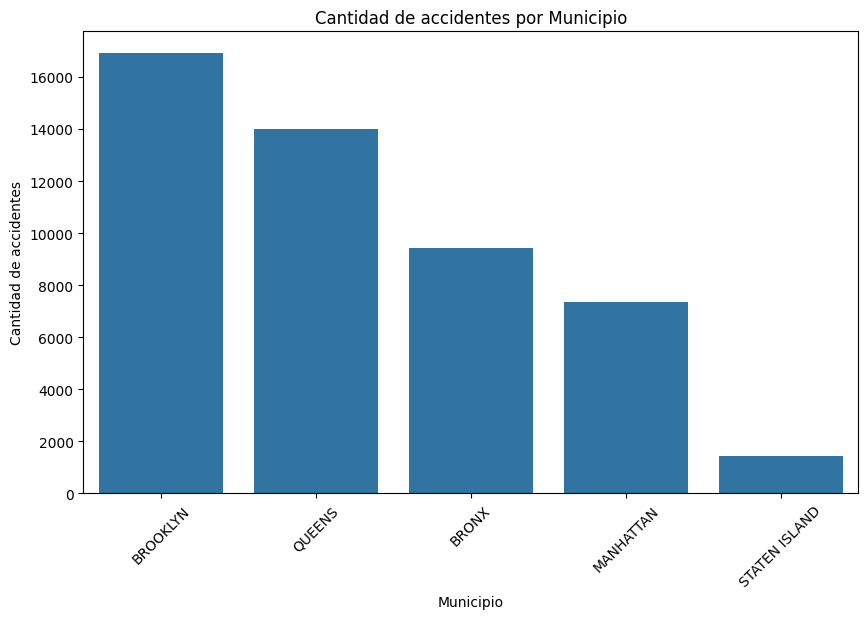

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='BOROUGH', data=df, order=df['BOROUGH'].value_counts().index)
plt.title("Cantidad de accidentes por Municipio")
plt.xlabel("Municipio")
plt.ylabel("Cantidad de accidentes")
plt.xticks(rotation=45)
plt.show()

# 8️⃣ Distribución de accidentes por hora

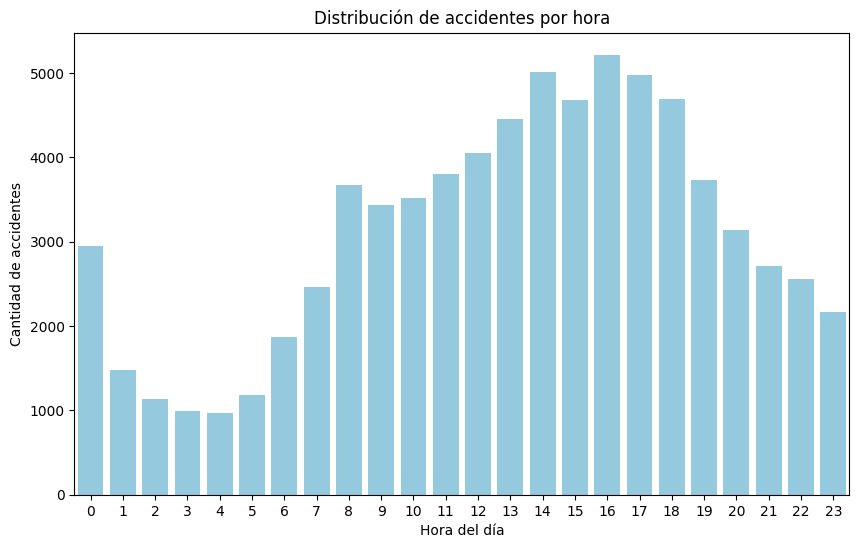

In [11]:
# Convertimos la hora a número para facilitar el análisis
df['HORA'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M:%S', errors='coerce').dt.hour

plt.figure(figsize=(10,6))
sns.countplot(x='HORA', data=df, color='skyblue')
plt.title("Distribución de accidentes por hora")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de accidentes")
plt.show()

# 9️⃣ Distribución de personas heridas por accidente

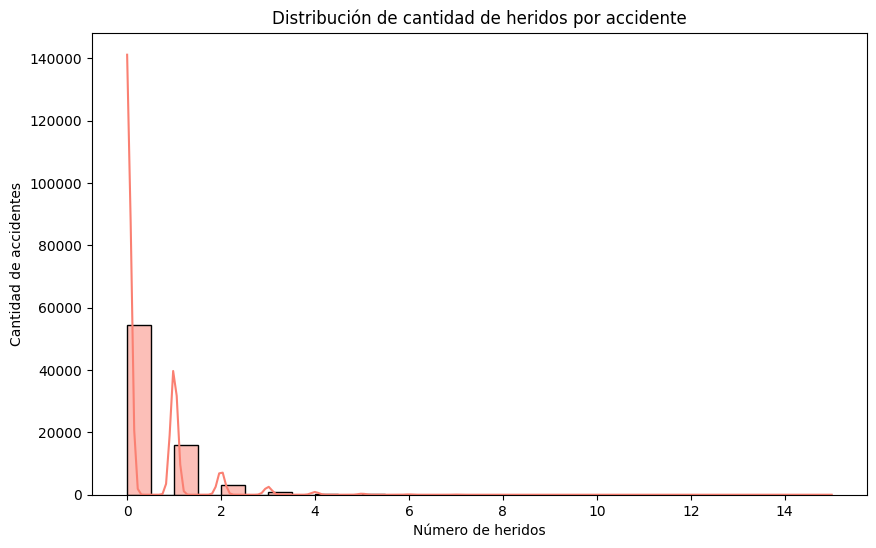

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['NUMBER OF PERSONS INJURED'], bins=30, kde=True, color='salmon')
plt.title("Distribución de cantidad de heridos por accidente")
plt.xlabel("Número de heridos")
plt.ylabel("Cantidad de accidentes")
plt.show()

🔧 Bloque 4: Visualizaciones multivariadas

🎯 Análisis 1 — Personas heridas según borough y tipo de vehículo

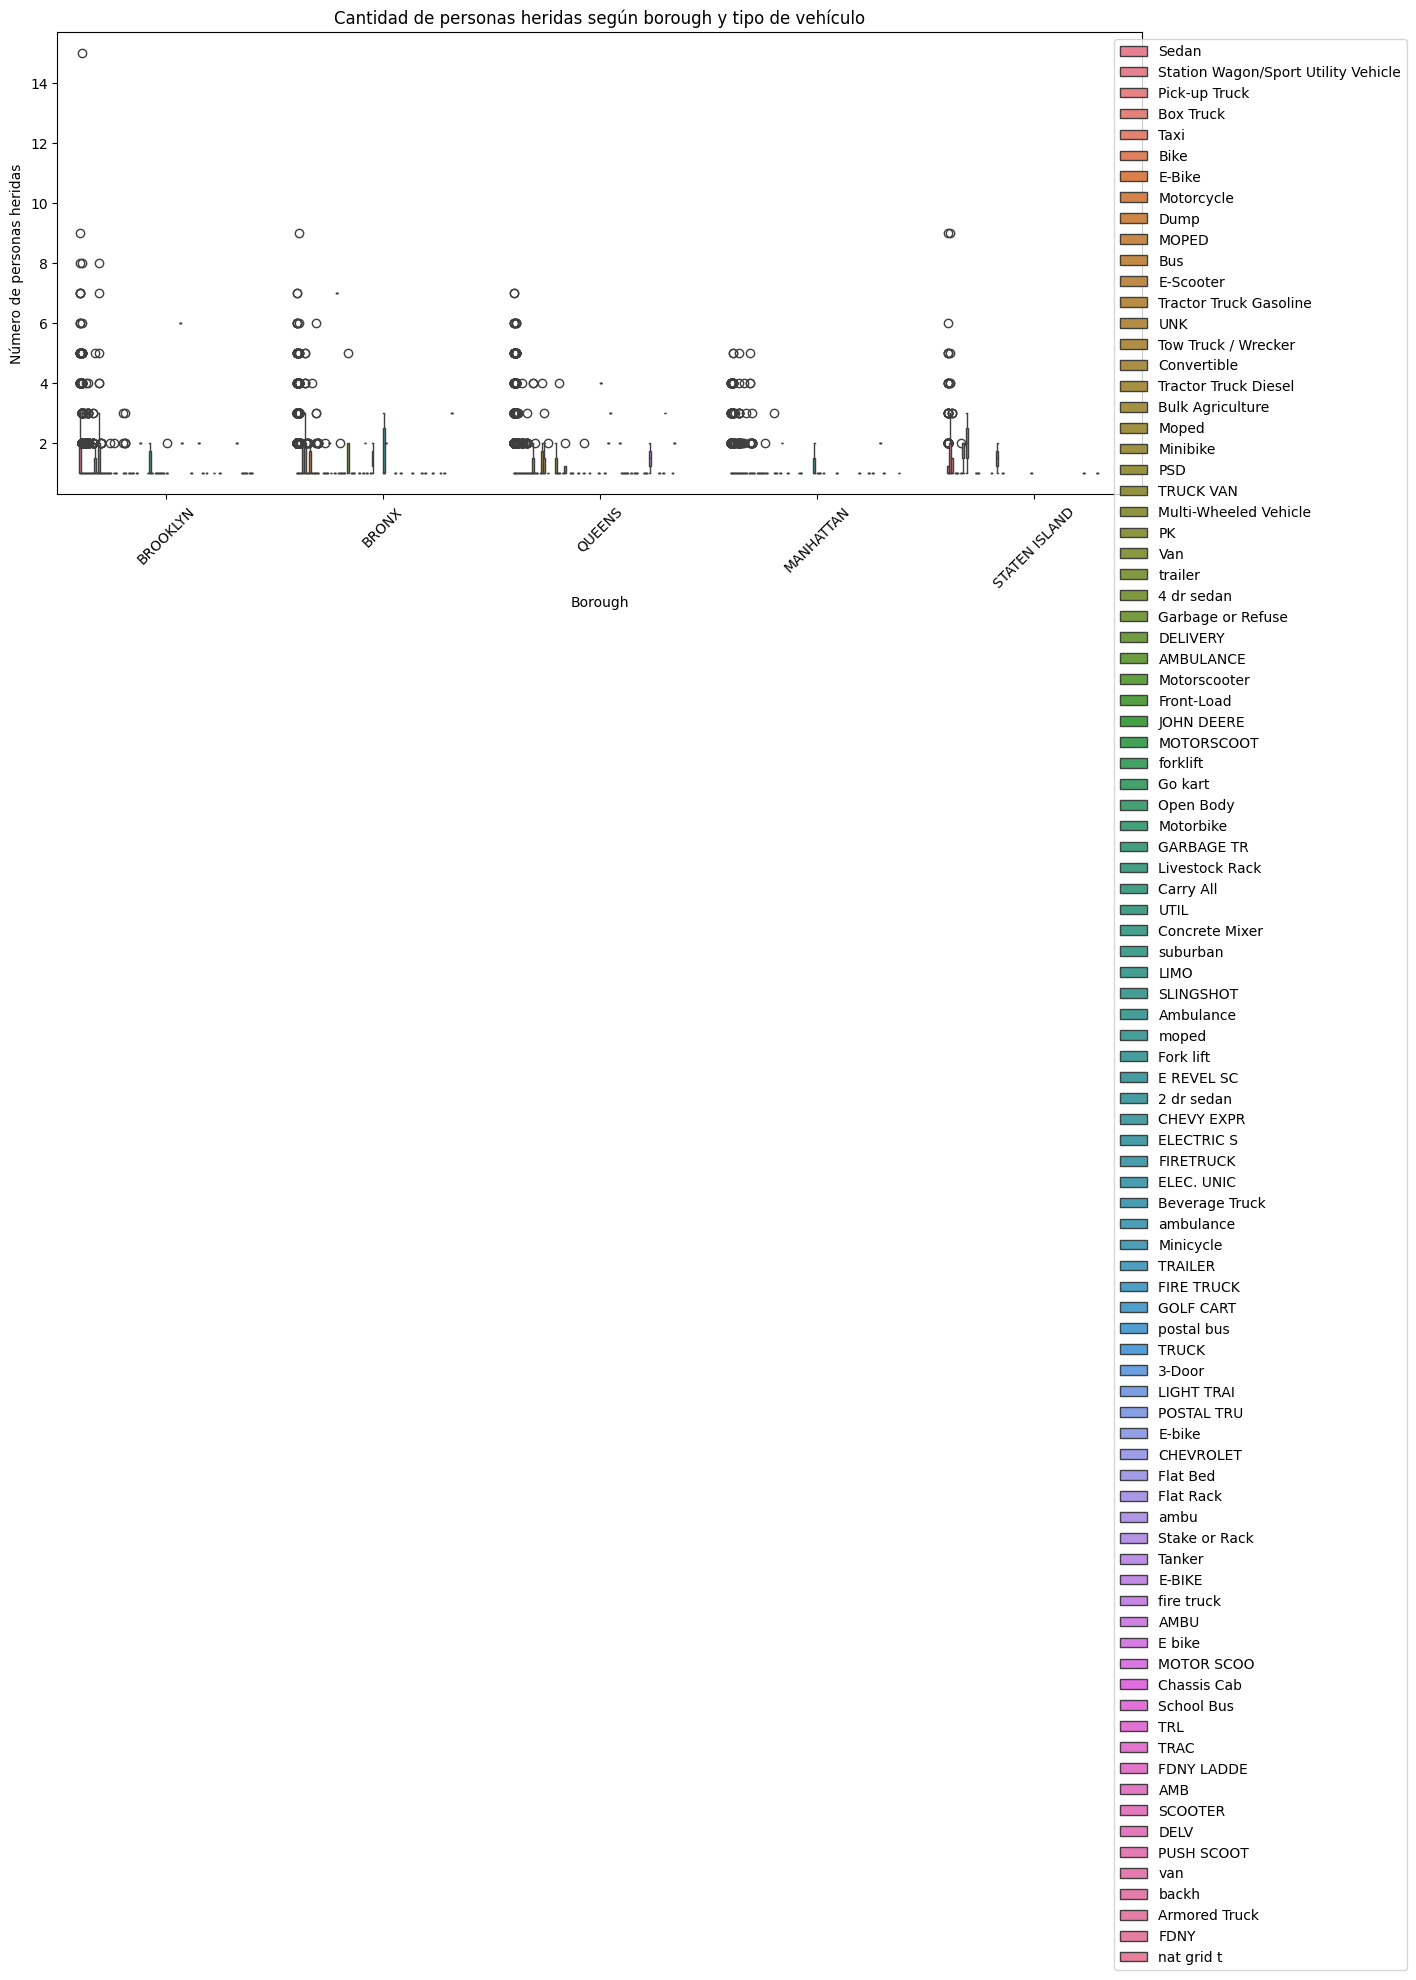

In [13]:
# Filtramos para quedarnos solo con los registros que tienen datos en VEHICLE TYPE CODE 1
df_multi = df.dropna(subset=['VEHICLE TYPE CODE 1', 'BOROUGH', 'NUMBER OF PERSONS INJURED'])

# Seleccionamos sólo los casos donde hubo al menos un herido
df_multi = df_multi[df_multi['NUMBER OF PERSONS INJURED'] > 0]

plt.figure(figsize=(14,6))
sns.boxplot(
    x='BOROUGH',
    y='NUMBER OF PERSONS INJURED',
    hue='VEHICLE TYPE CODE 1',
    data=df_multi
)
plt.title("Cantidad de personas heridas según borough y tipo de vehículo")
plt.xlabel("Borough")
plt.ylabel("Número de personas heridas")
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()